<a href="https://colab.research.google.com/github/jsung14/CS-260D-Large-Scale-Machine-Learning/blob/main/HW1_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

In [15]:
def set_seed(seed=2):
    np.random.seed(seed)
    random.seed(seed)

In [16]:
def get_data():

    set_seed()

    X = np.random.uniform(-1, 1, size=(N, D))
    w = np.random.uniform(-1, 1, size=D)
    y = np.matmul(X, w) + np.random.normal(size=N)
    return w, X, y

In [17]:
def gradient(w, x_i, y_i):
    return 2*(np.dot(w, x_i) - y_i)*x_i

def get_loss(w, X, y):
    return np.sum((np.matmul(X, w) - y)**2)

In [26]:
def sgd(w_0, X, y):

    set_seed()

    w = w_0
    k = 0
    losses = [get_loss(w, X, y)]
    for s in range(NUM_EPOCHS):
        for t in range(N):
            idx = np.random.choice(N)
            # w = w - lr/np.sqrt(k + 1)*gradient(w, X[idx], y[idx])
            w = w - lr*gradient(w, X[idx], y[idx])
            losses.append(get_loss(w, X, y))
            k += 1
    return losses, w

In [27]:
def sgd_shuffle(w_0, X, y):

    set_seed()

    w = w_0
    losses = [get_loss(w, X, y)]
    k = 0
    for s in range(NUM_EPOCHS):
        ndx = list(range(N))
        random.shuffle(ndx)
        for t in ndx:
         # w = w - lr/np.sqrt(k + 1)*gradient(w, X[t], y[t])
          w = w - lr*gradient(w, X[t], y[t])
          losses.append(get_loss(w, X, y))
          k += 1

    return losses, w

In [28]:
def sgd_momentum(w_0, X, y, beta=0.5):

    set_seed()

    w = w_0
    delta_w = np.zeros_like(w)  # Initialize delta_w to zero
    k = 0
    losses = [get_loss(w, X, y)]

    for s in range(NUM_EPOCHS):
        ndx = list(range(N))
        random.shuffle(ndx)
        for t in ndx:
          delta_w = beta*delta_w + (1 - beta)*gradient(w, X[t], y[t])
          #w = w - lr/np.sqrt(k + 1)*delta_w
          w = w - lr*delta_w
          losses.append(get_loss(w, X, y))
          k += 1

    return losses, w

In [21]:
def plot(loss):
    for name, loss_val in loss.items():
        plt.plot(np.arange(len(loss_val)), loss_val, label=name)
    plt.legend()
    plt.savefig('loss.png')

def main():
    w_0, X, y = get_data()
    loss = {}
    loss['SGD'], w_sgd = sgd(w_0, X, y)
    loss['SGD-shuffle'], w_sgd_shuffle = sgd_shuffle(w_0, X, y)
    loss['SGD-momentum'], w_sgd_momentum = sgd_momentum(w_0, X, y)
    plot(loss)
    plt.show()

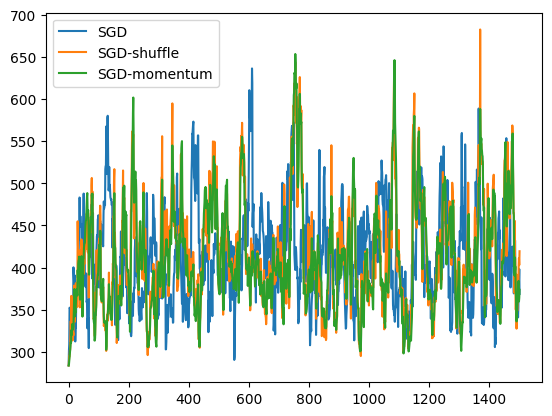

In [30]:
# 1.2 = Shuffle, momentum, SGD
# D = 10
# N = 300
# lr = 0.001
# NUM_EPOCHS = 5

# 1.3 = shuffle/momentum, SGD
# D = 10
# N = 300
# lr = 0.0001
# NUM_EPOCHS = 5

# 1.4 = none converge
# D = 10
# N = 300
# lr = 0.1
# NUM_EPOCHS = 5

# 1.5 = When learning rate is 0.001/root(k)

main()